In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
df=pd.read_csv(r'C:\Users\admin\Documents\Songs\Unsupervised_project\single_genre_artists.csv')
df

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.1840,4,...,0.993,0.000016,0.3250,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.1800,10,...,0.989,0.000000,0.1280,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.2060,0,...,0.995,0.000000,0.4180,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.4670,9,...,0.991,0.000000,0.2190,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.2980,9,...,0.991,0.000000,0.3730,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95832,44r4zta6P9flkhKaVnbsvG,Freaks,70,174800,0,14Y3trk7LaslSFTk1G35rx,2019-02-25,0.674,0.5680,1,...,0.116,0.000000,0.1650,0.640,166.107,4,16057.0,['alt z'],Jordan Clarke,56
95833,0MmaEacabpK8Yp3Mdeo5uY,下雨天,50,265846,0,5VGgFE9nPgMfEnYiPT5J2B,2020-02-25,0.528,0.6730,4,...,0.143,0.000000,0.0989,0.297,130.066,4,929.0,['chinese viral pop'],芝麻,36
95834,1dKxf4Ht2SsKLyXfSDJAgy,The Cutest Puppy,67,82500,0,7vgGpuiXdNlCmc994PlMlz,2020-10-30,0.609,0.0172,8,...,0.996,0.973000,0.1080,0.890,68.619,4,23.0,['instrumental lullaby'],Laureen Conrad,52
95835,0SjsIzJkZfDU7wlcdklEFR,John Brown's Song,66,185250,0,4MxqhahGRT4BPz1PilXGeu,2020-03-20,0.562,0.0331,1,...,0.996,0.961000,0.1110,0.386,63.696,3,91.0,['instrumental lullaby'],Gregory Oberle,55


In [5]:
df.columns

Index(['id_songs', 'name_song', 'popularity_songs', 'duration_ms', 'explicit',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'followers', 'genres',
       'name_artists', 'popularity_artists'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95837 entries, 0 to 95836
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_songs            95837 non-null  object 
 1   name_song           95837 non-null  object 
 2   popularity_songs    95837 non-null  int64  
 3   duration_ms         95837 non-null  int64  
 4   explicit            95837 non-null  int64  
 5   id_artists          95837 non-null  object 
 6   release_date        95837 non-null  object 
 7   danceability        95837 non-null  float64
 8   energy              95837 non-null  float64
 9   key                 95837 non-null  int64  
 10  loudness            95837 non-null  float64
 11  mode                95837 non-null  int64  
 12  speechiness         95837 non-null  float64
 13  acousticness        95837 non-null  float64
 14  instrumentalness    95837 non-null  float64
 15  liveness            95837 non-null  float64
 16  vale

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

id_songs              0
name_song             0
popularity_songs      0
duration_ms           0
explicit              0
id_artists            0
release_date          0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
followers             0
genres                0
name_artists          0
popularity_artists    0
dtype: int64

###Feature Selection

In [13]:
X= df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
         'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
X


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.563,0.1840,-13.757,0.0512,0.993,0.000016,0.3250,0.654,133.088,161427
1,0.427,0.1800,-15.375,0.0670,0.989,0.000000,0.1280,0.431,78.459,223440
2,0.511,0.2060,-15.514,0.0592,0.995,0.000000,0.4180,0.481,70.443,208267
3,0.676,0.4670,-12.393,0.1650,0.991,0.000000,0.2190,0.726,129.775,161933
4,0.650,0.2980,-13.806,0.1380,0.991,0.000000,0.3730,0.844,75.950,167973
...,...,...,...,...,...,...,...,...,...,...
95832,0.674,0.5680,-6.356,0.0408,0.116,0.000000,0.1650,0.640,166.107,174800
95833,0.528,0.6730,-3.639,0.0314,0.143,0.000000,0.0989,0.297,130.066,265846
95834,0.609,0.0172,-28.573,0.1180,0.996,0.973000,0.1080,0.890,68.619,82500
95835,0.562,0.0331,-25.551,0.1030,0.996,0.961000,0.1110,0.386,63.696,185250


In [21]:
X=X.sample(20000)

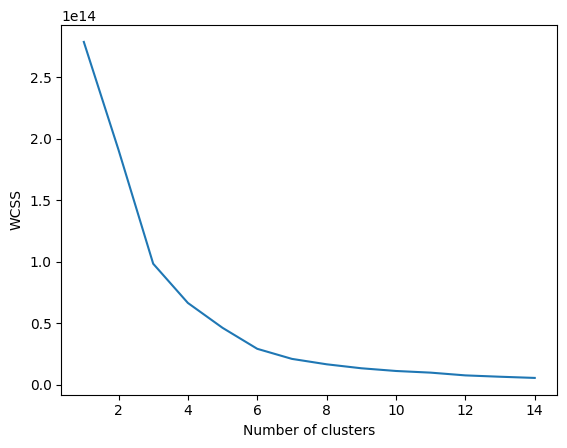

In [22]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,random_state=0,n_init='auto',max_iter=3000)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,15),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
kmeans=KMeans(n_clusters=6,random_state=0,n_init='auto')
kmeans.fit(X)
kmeans.inertia_
X['Target']=kmeans.predict(X)
X


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Target
19106,0.445,0.853,-9.037,0.0625,0.130000,0.000007,0.1340,0.5270,90.376,309453,1
49689,0.621,0.950,-5.912,0.0628,0.000623,0.786000,0.7850,0.0913,132.018,187363,3
52330,0.743,0.856,-6.426,0.0403,0.091100,0.002230,0.1640,0.9780,100.023,224733,3
75172,0.770,0.857,-6.299,0.0886,0.247000,0.000000,0.0252,0.9690,91.067,223080,3
22683,0.658,0.439,-11.473,0.7880,0.736000,0.000000,0.5570,0.5590,86.591,94707,0
...,...,...,...,...,...,...,...,...,...,...,...
83722,0.293,0.840,-6.305,0.0335,0.000880,0.040800,0.1170,0.5540,92.551,256200,1
47884,0.560,0.673,-4.662,0.1100,0.180000,0.000000,0.3930,0.4660,86.314,256533,1
4427,0.374,0.508,-10.383,0.0312,0.497000,0.000000,0.3520,0.2880,133.059,662773,4
29950,0.560,0.909,-4.425,0.0640,0.169000,0.000061,0.2670,0.4120,130.006,198027,3


In [24]:
score=silhouette_score(X,kmeans.labels_)
score

0.5589030712147239